# Day 2 - Tools and Libraries

In [1]:
%reload_ext autoreload
%autoreload 2

# Load environment variables
import dotenv
dotenv.load_dotenv("../../.env", override=True)

True

# Orchestration - [Langchain](https://python.langchain.com/en/latest/index.html)


# Langchain

LangChain is a framework for developing applications powered by language models. 
The LangChain framework is designed around facilitating applications that are:
- Data-aware: connect a language model to other sources of data
- Agentic: allow a language model to interact with its environment


## Useful Docs
- [Agents](https://python.langchain.com/docs/modules/agents/)
- [Retrieval](https://python.langchain.com/docs/modules/data_connection/)
- [Memory](https://python.langchain.com/docs/modules/memory/)

## *Covered in Bootcamp 1.0*
If you are not familiar with these concepts at all, take a look here:
- [Prompt Templates](https://github.com/georgian-io/genai-bootcamp/blob/main/archive/2023_june/notebooks/day-2/01-langchain.ipynb)
- [Chains](https://github.com/georgian-io/genai-bootcamp/blob/main/archive/2023_june/notebooks/day-2/01-langchain.ipynb)
- [Intro to Agents](https://github.com/georgian-io/genai-bootcamp/blob/main/archive/2023_june/notebooks/day-2/01-langchain.ipynb)

## Defining an LLM

On day 1, we showed you several examples of how to do the same task using different APIs.

Langchain makes switching between these backends easier

In [2]:
import os
from pprint import pprint
from langchain.llms import BaseLLM
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
from langchain.chat_models import ChatAnyscale
from langchain.chat_models.vertexai import ChatVertexAI
from langchain.chat_models.bedrock import BedrockChat
    
llms = {}

# OpenAI
llms['OpenAI GPT 3.5'] = ChatOpenAI(
    model_name='gpt-3.5-turbo',
    temperature=0,
)

llms['OpenAI GPT 4'] = ChatOpenAI(
    model_name='gpt-4',
    temperature=0,
)

# LLaMa 2
llms['Llama 2 - 7B'] = ChatAnyscale(
    anyscale_api_key=os.getenv('ANYSCALE_ENDPOINT_TOKEN'),
    temperature=0, model_name="meta-llama/Llama-2-7b-chat-hf", 
    streaming=True
)

llms['Llama 2 - 70B'] = ChatAnyscale(
    anyscale_api_key=os.getenv('ANYSCALE_ENDPOINT_TOKEN'),
    temperature=0, model_name="meta-llama/Llama-2-70b-chat-hf", 
    streaming=True
)

# Google
llms['Google PaLM'] = ChatVertexAI()

# Claude (TBD)
llms['Anthropic Claude 2'] = BedrockChat(model_id='anthropic.claude-v2')


In [45]:

def test_llm(llm: BaseLLM):
    pprint(llm.predict_messages([HumanMessage(content="Who are you?")]).content)

for key, llm in llms.items():
    print(f"\n--- Testing {key} ---")
    test_llm(llm)


--- Testing OpenAI GPT 3.5 ---
('I am an AI language model developed by OpenAI. I am designed to assist with '
 'answering questions and engaging in conversations on a wide range of topics.')

--- Testing OpenAI GPT 4 ---
('I am an artificial intelligence developed by OpenAI, known as GPT-3. I am '
 'designed to assist with information and tasks, and to engage in conversation '
 'with users.')

--- Testing Llama 2 - 7B ---
("  Hello! I'm LLaMA, an AI assistant developed by Meta AI that can understand "
 'and respond to human input in a conversational manner. My primary function '
 "is to assist and provide helpful responses to users' inquiries, much like a "
 "chatbot or virtual assistant. I'm here to help you with any questions or "
 "topics you'd like to discuss, so feel free to ask me anything!")

--- Testing Llama 2 - 70B ---
("  Hello! My name is LLaMA, I'm a large language model trained by a team of "
 'researcher at Meta AI. My primary function is to understand and respond to '

### Examples of projects using Langchain
- [superagent](https://github.com/homanp/superagent/tree/main)
- [gpt-engineer](https://github.com/AntonOsika/gpt-engineer)

# Domain Specific - [Pandas AI](https://docs.pandas-ai.com/en/latest/)

In [46]:
from pandasai import SmartDataframe
from pandasai.helpers.logger import Logger
import pandas as pd

logger = Logger(verbose = True)

In [29]:
df = pd.read_csv('../extra_resources/candy-data.csv')
sdf = SmartDataframe(df, config={"llm": llms['OpenAI GPT 3.5']}, logger=logger)


In [30]:
sdf.chat('Which is the healthiest candy and why?')

'The healthiest candy is One dime.'

In [31]:
sdf.chat('Which is the healthiest candy that has chocolate and peanuts?')

'The healthiest candy with chocolate and peanuts is ReeseÕs Miniatures.'

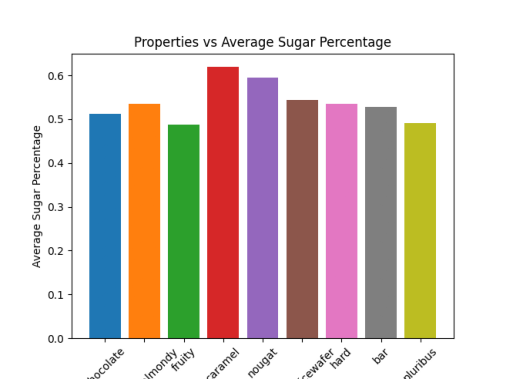

In [32]:
sdf.chat('Properties are things like chocolate, peanuts, etc. Plot properties vs avg sugar percentage of candies with that property.')

In [42]:
# You can check the tool logs like this
logger.logs[-5:]

[{'msg': 'Using prompt: \nYou are provided with the following pandas DataFrames:\n\n<dataframe>\nDataframe dfs[0], with 85 rows and 13 columns.\nThis is the metadata of the dataframe dfs[0]:\ncompetitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent\nOne quarter,0,0,0,0,0,0,0,0,0,0.011,0.51099998,46.116505\nAir Heads,0,1,0,0,0,0,0,0,0,0.90600002,0.51099998,52.341465\n3 Musketeers,1,0,0,0,1,0,0,1,0,0.60399997,0.51099998,67.602936\nOne dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086\n100 Grand,1,0,1,0,0,1,0,1,0,0.73199999,0.86000001,66.971725\n</dataframe>\n\n<conversation>\nUser 1: Explain the previous plot?\n</conversation>\n\nThis is the initial python code to be updated:\n```python\n# TODO import all the dependencies required\nimport pandas as pd\n\ndef analyze_data(dfs: list[pd.DataFrame]) -> dict:\n    """\n    Analyze the data\n    1. Prepare: Preprocessing and cleaning data if necessary\n    2. Process: Mani

# And many more

### Advice
- Someone probably has already thought your idea
  - Do some research first, get ideas, learn from your mistakes
- Brainstorm a bit first
  - Think through the problem you are facing and think to yourself, if I were to try to build a startup around this idea, what would that look like?
  - Then google exactly that, it might exists already (good! you can start from there and save yourself some time)

Resources:
- Collections
  - [AI Collection](https://github.com/ai-collection/ai-collection)
  - [Awesome Generative AI](https://github.com/filipecalegario/awesome-generative-ai)
- Search
  - [Github](https://github.com/topics/generative-ai)
  - [Google](https://letmegooglethat.com/?q=Generative+AI+for+excel+%2B+github)